## Description

This is testing to see if we get the same (or similar) results to CNN_6_1 using CNN_5_0 data: Combined/LaFleur_supp.csv.

This version applies np.exp() to log(TX/Txref) to get TX/Txref. However, more negative log(TX/Txref) are higher transcriptions, so a TX/Txref close to 0 would represent high transcrition, too. To ensure 0 is low transcription and 1 is high, we use the "Reversed Normalized Observed TX/Txref" using "1 - MinMaxScaler()".

In [1]:
from CNN_6_1_3 import *

In [2]:
# Documentation variables
name = 'CNN_6_1_3'
model_path = f'../Models/{name}.keras'
data_path = '../Data/Combined/LaFleur_supp.csv'
search_dir = '../Testing CNN/Hyperparameter Search'

# Hyperparameter tuning variables
max_trials = 30

# Unoptimized training Hyperparameters
loss = 'mean_squared_error'
epochs = 100
batch_size = 32

# Hyperparameter ranges dictionary
hyperparam_ranges = {
    'num_layers': (1, 3),
    'filters': [32, 64, 128],
    'kernel_size': [3, 4, 5],
    'strides': [1, 2],
    'pool_size': [2, 3],
    'activation': ['relu', 'tanh'],
    'dense_units': (32, 128, 32),
    'learning_rate': (1e-4, 1e-2)
}

In [3]:
# This is just for demonstration purposes

df = load_df(data_path)
df.sort_values(by='Reversed Normalized Observed TX/Txref', ascending=False).head()

,File Name,Upstream DNA,Promoter Sequence,Downstream DNA,Observed log(TX/Txref),Reversed Normalized Observed TX/Txref
18177,"Hossain et al (Fig 3d, S7d).csv",TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,GCGCTGAATCACCGATTCGGTTGACAATCCCCACGAAGGCAGTTAT...,TTCATACCGACGAGAGATCAGC,-13.617055,1.000000
16849,"Hossain et al (Fig 3d, S7d).csv",TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,GCGCCCGTCAAACAAATAGATTGAGACCAGTCGACACTAGGGCTAT...,TTCATACCGACGAGAGATCAGC,-13.436896,1.000000
17930,"Hossain et al (Fig 3d, S7d).csv",TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,GCGCCAGACAATTTCTGTATTTGACAAATCTGATGCTACGAAGTAT...,TTCATACCGACGAGAGATCAGC,-13.096696,0.999999
17232,"Hossain et al (Fig 3d, S7d).csv",TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,GCGCACATCCGACCGCTGTCTTGACAGTCGAAGTCATATCCTTTAT...,TTCATACCGACGAGAGATCAGC,-13.085901,0.999999
18271,"Hossain et al (Fig 3d, S7d).csv",TATCCTCGAGCGCGGAATTCCCTAGGGGATCC,CGCGCTCCGCTGATATAGACTTGACAAACCGTAAGACAAAAGCTAC...,TTCATACCGACGAGAGATCAGC,-12.981563,0.999999


In [4]:
X, y = load_features(data_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Perform Bayesian Optimization
best_model = train_best_model(name, search_dir, X_train, y_train, X_test, y_test,
                                X_train.shape[1:], loss, max_trials, epochs, batch_size, hyperparam_ranges)

# Save the best model
best_model.save(model_path)

Trial 30 Complete [00h 07m 34s]
val_loss: 0.001938546309247613

Best val_loss So Far: 0.001766612520441413
Total elapsed time: 02h 39m 47s


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [7]:
# Load, predict, and evaluate the best model
y_pred = load_and_predict(model_path, X_test)
mse, rmse, mae, r2 = calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
MSE:  0.0017666120099257832
RMSE:  0.04203108385380733
MAE:  0.023357858793016186
R2:  0.8820673350728289


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


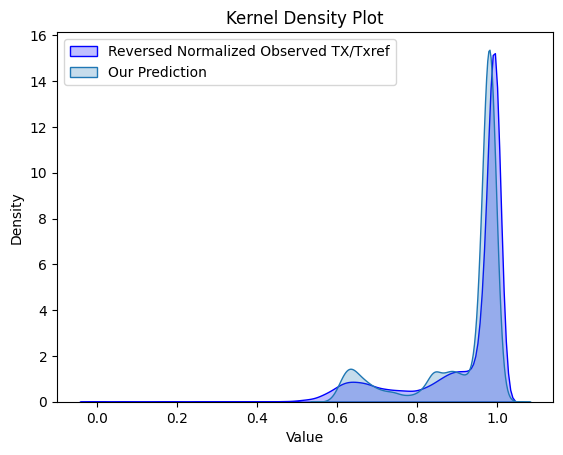

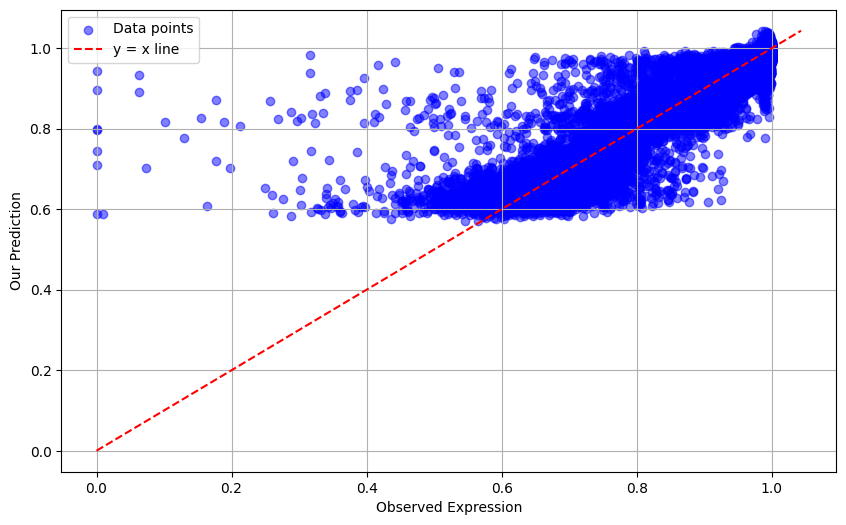

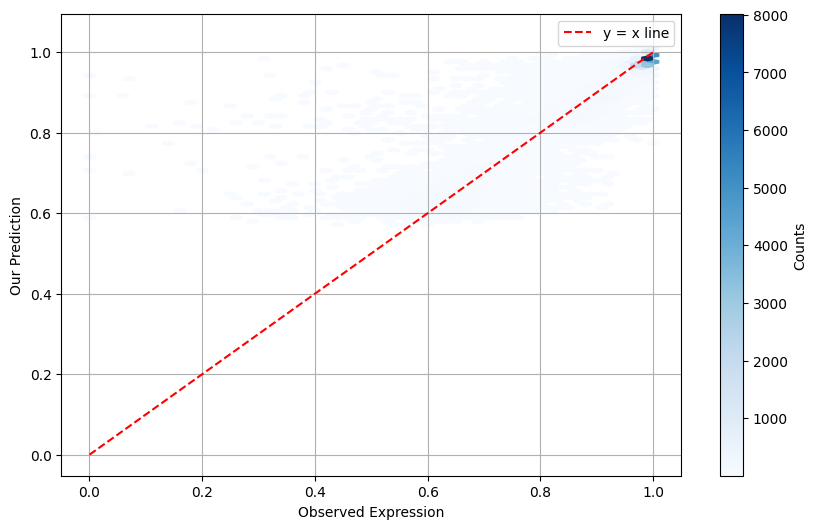

In [15]:
df = load_df(data_path)

predicted = load_and_predict(model_path, X)
observed = df['Reversed Normalized Observed TX/Txref'].values

plot_kde(observed, predicted)
plot_scatter(observed, np.ravel(predicted))
plot_hexbin(observed, np.ravel(predicted))